# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

Ans: Expected value is 15 magical elixirs. The actual number might differ from the given probability for the first 100 loot boxes but as the number of loot boxes purchased increases, the proportion of magical elixirs obtained will tend towards 15%.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

Ans: The more loot boxes someone purchases, the higher his/her chances of getting at least 1 elixir. It is also possible that someone does not get an elixir at all despite purchasing an infinite number of loot boxes.

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

Ans: The number of elixirs obtained is strictly an integer, which is discrete.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

Ans: Binomial distribution. Binomial refers the number of successes in the 100 independent trials, where success is defined as obtaining an elixir and trial is defined as buying a loot box. The buying of loot boxes are independent as the probabilities of obtaining an elixir remain unchanged.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

$$
P(X > 20) = 1 - [P(X = 0) + P(X = 1) + ... + P(X = 20)]
$$

In [237]:
import scipy.stats as stats
total = 0
for i in range(21):
    total += stats.binom.pmf(i, 100, 0.15)
print(f"P(X > 20) = {1 - total} via PMF.")

P(X > 20) = 0.06631976581888199 via PMF.


<BarContainer object of 30 artists>

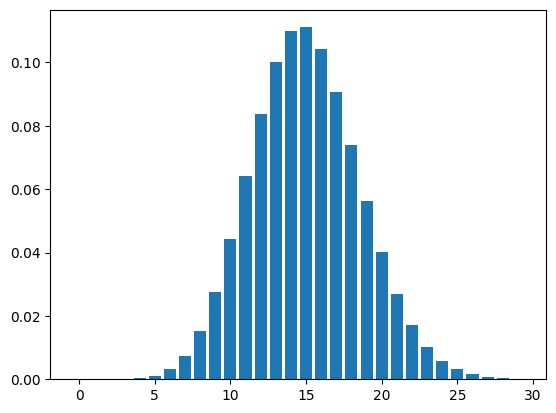

In [238]:
import matplotlib.pyplot as plt
lst = list(range(30))
dist = stats.binom.pmf(lst, 100, 0.15)

plt.bar(lst, dist)

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

$$
P(X > 20) = 1 - P(X \leq 20)
$$

In [204]:
elix_dist = stats.binom(p = 0.15, n = 100)
cdf = elix_dist.cdf(20)
print(f"P(X > 20) = {1 - cdf} via CDF.")

P(X > 20) = 0.06631976581888155 via CDF.


<BarContainer object of 30 artists>

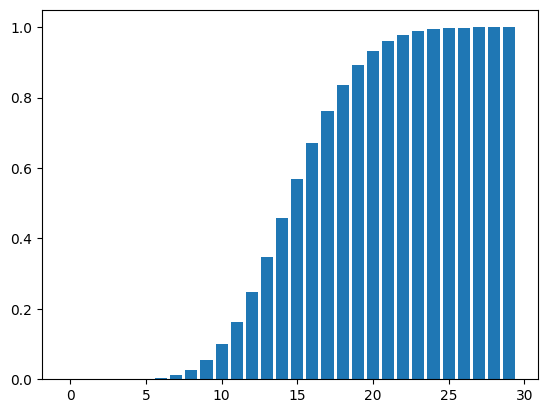

In [205]:
lst = list(range(30))
dist = stats.binom.cdf(lst, 100, 0.15)

plt.bar(lst, dist)

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

Ans: There is a 6.6% chance that a user will obtain more than 20 elixirs.

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

Ans: Poisson distribution. Poisson distribution predicts the number of events occuring within a specific time period, given a constant rate. The number of events refers to the number of loot boxes obtained while the time period is referring to game last month and constant rate referring to the number of loot boxes purchased in a month.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [239]:
import math

def round_up_to_thousand(number):
    return int(math.ceil(number / 1000.0)) * 1000
    
round_up_to_thousand(500000/2.7)

186000

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [236]:
# Show your work; leave your answer in a comment.

total_low = 0
for i in range(5):
    print(f"There are ${round(186000 * stats.poisson(mu = 2.7).pmf(i))} users expected to purchase {i} loot boxes.")
    total_low += round(186000 * stats.poisson(mu = 2.7).pmf(i))

print(f"${total_low} earned from low value users.")
print(f"${500000 - total_low} earned from high value users.")

There are $12500 users expected to purchase 0 loot boxes.
There are $33751 users expected to purchase 1 loot boxes.
There are $45563 users expected to purchase 2 loot boxes.
There are $41007 users expected to purchase 3 loot boxes.
There are $27680 users expected to purchase 4 loot boxes.
$160501 earned from low value users.
$339499 earned from high value users.


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

Ans: To show the following stats:
a) Average number of loot boxes purchased by low value/high value/all users.
b) Total number of loot boxes purchased by low value/high value/all users, as well as percentages of total for low/high value users.
c) Provide data from previous months for comparison and present in line graphs, categorised by low/high/total users

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [229]:
lst = []
np.random.seed(42)

import numpy as np
for i in range(1, 100001):
    counter = 0
    #print(i)
    while True:
        arr = np.random.choice(['elixir', 'rubbish'], 1, p = [0.15, 0.85], replace = True)
        #print(arr)
        if 'elixir' in arr:
            counter += 1
            lst.append(counter)
            break
        else:
            counter += 1

print(np.mean(lst))

pct = [5, 25, 50, 75, 95]

for num in pct:
    print(f"{num}th percentile is {np.percentile(lst, num)}")

6.68826
5th percentile is 1.0
25th percentile is 2.0
50th percentile is 5.0
75th percentile is 9.0
95th percentile is 19.0


**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

Ans: Dictionary. Because you can simply add on more key value pairs to the dictionary for future updates to the loot box's list of items.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

Ans: Version 1 only has 1 item (magical elixir) with 15% chance of occurence. We can assign a rarity value, which acts as a multiple and takes the value of of 0, 1, 2, 3, 4 for nothing, bronze coin, steel armor, golden pendant and magical elixir respectively. For every 100 loot boxes draws,

version 1: (number of elixir) * (0.15) * 4 + (number of nothing) * (0.85) * 0
version 2: (number of elixir) * (0.01) * 4 + (number of golden pendant) * (0.09) + ... + (number of bronze coin) * (0.6) * 1

From the metrics above, whichever version got the higher number is deemed to provide the most value for players. This is assuming that 'better' is defined as the value that players get from purchasing loot boxes.